Biden original: (538925, 25)
Trump original: (671696, 25)
Biden réduit: (269462, 3) ≈ 83.1 MB
Trump réduit: (167924, 3) ≈ 52.7 MB
CSV réduits sauvegardés dans data/ sous format .csv.gz

Top 10 US States – Tweets Biden vs Trump
                      Biden  Trump
state                             
CALIFORNIA            13009   7900
NEW YORK              10481   5758
TEXAS                  7030   4175
FLORIDA                6624   4170
DISTRICT OF COLUMBIA   3464   2347
ILLINOIS               2780   1787
PENNSYLVANIA           2720   1697
OHIO                   2171    984
NEW JERSEY             1980   1237
MASSACHUSETTS          1864   1220


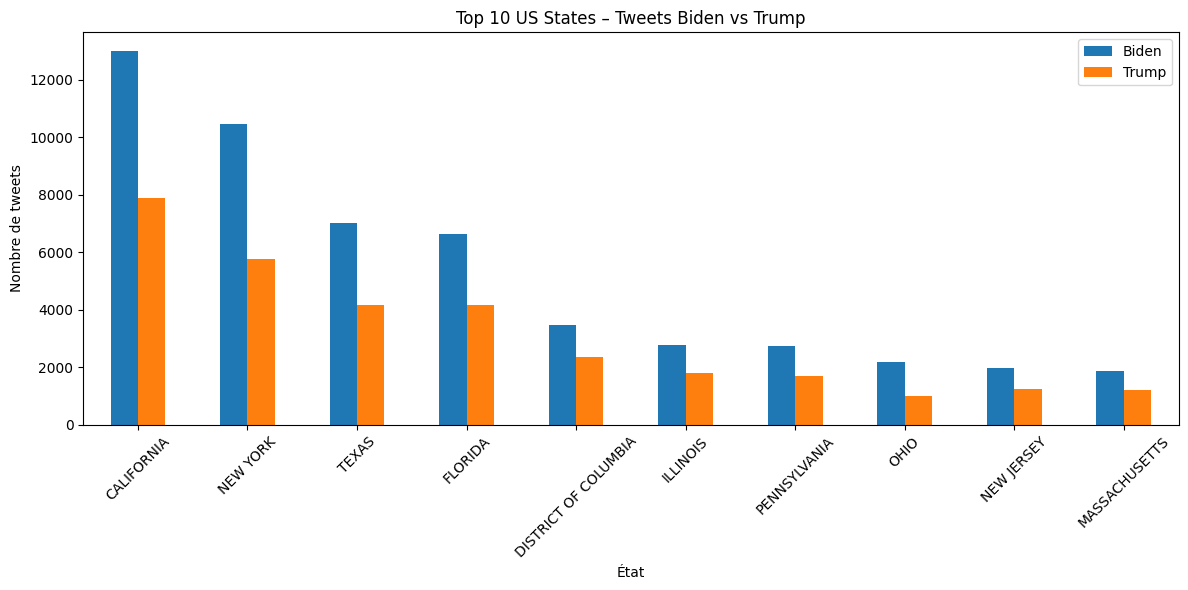

In [13]:
# -----------------------------
# geography_exploration.ipynb
# -----------------------------

import pandas as pd
import matplotlib.pyplot as plt
import sys, os

# Ajouter le dossier src
sys.path.append(os.path.join(os.getcwd(), "src"))
from geography_analysis import GeographyAnalyzer

# -----------------------------
# 1️⃣ Lecture des CSV originaux
# -----------------------------
biden_path = os.path.join("data", "biden_clean.csv")
trump_path = os.path.join("data", "trump_clean.csv")

biden = pd.read_csv(biden_path, sep=";", low_memory=False)
trump = pd.read_csv(trump_path, sep=";", low_memory=False)

print("Biden original:", biden.shape)
print("Trump original:", trump.shape)

# -----------------------------
# 2️⃣ Réduction de la taille des CSV
# -----------------------------
# Colonnes essentielles : date, texte nettoyé, état
cols_keep = ["created_at", "text_clean", "state"]

biden_small = biden[cols_keep].copy()
trump_small = trump[cols_keep].copy()

# Vérification taille approximative
def estimated_size_mb(df):
    return df.memory_usage(deep=True).sum() / (1024**2)

target_mb = 90  # marge pour GitHub

while estimated_size_mb(biden_small) > target_mb:
    biden_small = biden_small.sample(frac=0.5, random_state=42)

while estimated_size_mb(trump_small) > target_mb:
    trump_small = trump_small.sample(frac=0.5, random_state=42)

print("Biden réduit:", biden_small.shape, "≈", round(estimated_size_mb(biden_small),1), "MB")
print("Trump réduit:", trump_small.shape, "≈", round(estimated_size_mb(trump_small),1), "MB")

# -----------------------------
# 3️⃣ Sauvegarde compressée
# -----------------------------
biden_small.to_csv("data/biden_small.csv.gz", index=False, compression="gzip")
trump_small.to_csv("data/trump_small.csv.gz", index=False, compression="gzip")
print("CSV réduits sauvegardés dans data/ sous format .csv.gz")

# -----------------------------
# 4️⃣ Création des analyzers avec fichiers réduits
# -----------------------------
biden_geo = GeographyAnalyzer(biden_small, "Biden")
trump_geo = GeographyAnalyzer(trump_small, "Trump")

# -----------------------------
# 5️⃣ Comparaison tweets par état
# -----------------------------
comparison_us = biden_geo.comparison_with(trump_geo)

# Top 10 États par tweets Biden
comparison_top10 = comparison_us.sort_values(by="Biden", ascending=False).head(10)
print("\nTop 10 US States – Tweets Biden vs Trump")
print(comparison_top10)

# -----------------------------
# 6️⃣ Visualisation
# -----------------------------
comparison_top10.plot(
    kind="bar",
    figsize=(12,6),
    title="Top 10 US States – Tweets Biden vs Trump"
)
plt.xlabel("État")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
